# Part-1 Data Preprocessing

Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [3]:
df=pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Removing column name as it has too many unique values and high cardinality.

In [5]:
df.drop('name',axis=1,inplace=True)

Dropping duplicate values

In [6]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

Adding a column years_driven

In [7]:
df['Current year']=2021

In [8]:
years_driven=df['Current year']-df['year']

In [9]:
df['years_driven']=years_driven

In [10]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Current year,years_driven
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2021,7
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2021,7
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2021,15
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2021,11
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,2021,14


In [11]:
df.drop(['year','Current year'],axis=1,inplace=True)

Dropping null values

In [12]:
df.isnull().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
years_driven       0
dtype: int64

In [13]:
df.dropna(inplace=True)

Converting datatypes of values so that we can use it later in the model.

In [14]:
df.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
years_driven       int64
dtype: object

In [15]:
df.mileage=df.mileage.str.replace(' kmpl','')

In [16]:
df.mileage=df.mileage.str.replace(' km/kg','')

In [17]:
df.engine=df.engine.str.replace(' CC','')

In [18]:
df.max_power=df.max_power.str.replace(' bhp','')

In [19]:
df['torque']=df.torque.str.extract('(^\d*)')

In [20]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,years_driven
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250,5.0,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,12,5.0,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22,5.0,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,11,5.0,14


In [21]:
df['mileage']=df.mileage.astype(float)

In [22]:
df['mileage']=df.mileage.astype(int)

In [23]:
df['engine']=df.engine.astype(int)

In [24]:
df['max_power']=df.max_power.astype(float)

In [25]:
df['max_power']=df.max_power.astype(int)

In [26]:
df['torque']=df.torque.astype(int)

In [27]:
df['seats']=df.seats.astype(int)

In [28]:
df.dtypes

selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
mileage           int64
engine            int64
max_power         int64
torque            int64
seats             int64
years_driven      int64
dtype: object

Visualising the data using a pairplot.

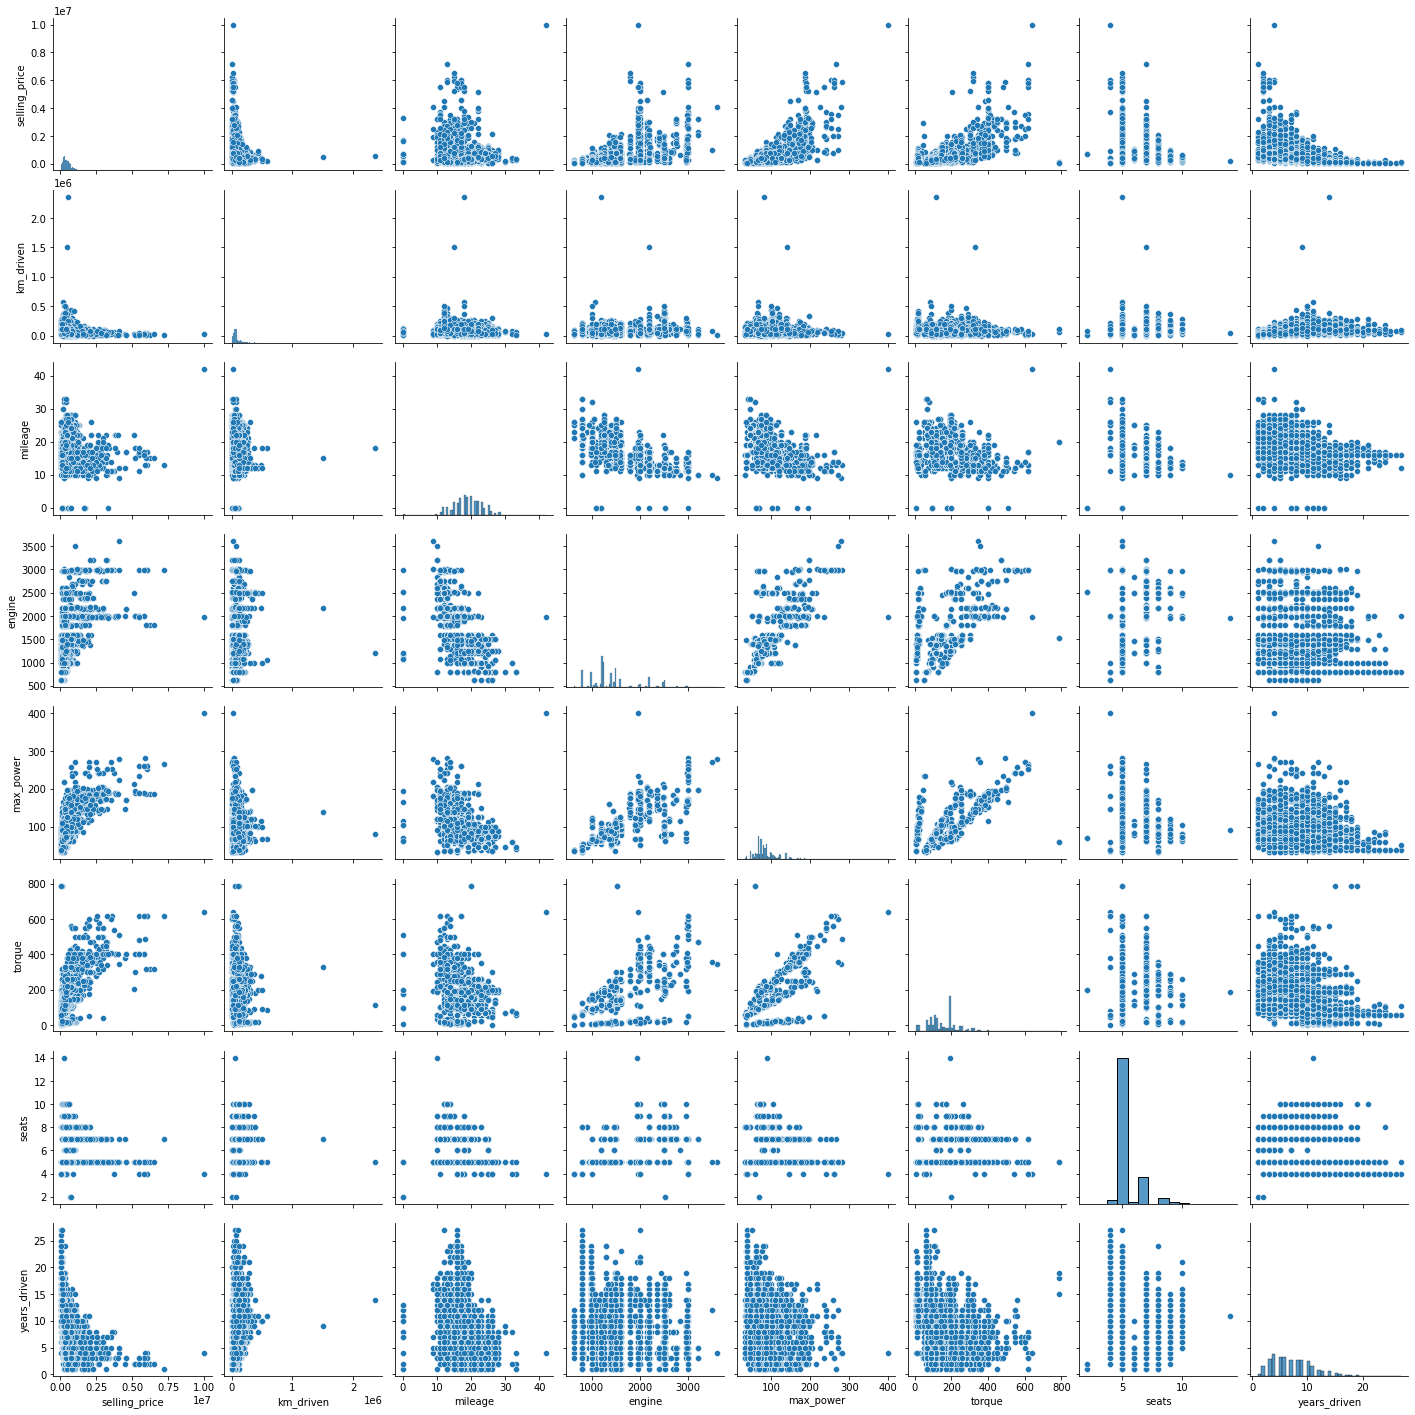

In [29]:
sns.pairplot(df)

Getting dummy variables for categorical values.

In [30]:
gg=pd.get_dummies(df)

In [31]:
gg.head()

,selling_price,km_driven,mileage,engine,max_power,torque,seats,years_driven,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23,1248,74,190,5,7,0,1,...,0,1,0,0,1,1,0,0,0,0
1,370000,120000,21,1498,103,250,5,7,0,1,...,0,1,0,0,1,0,0,1,0,0
2,158000,140000,17,1497,78,12,5,15,0,0,...,0,1,0,0,1,0,0,0,0,1
3,225000,127000,23,1396,90,22,5,11,0,1,...,0,1,0,0,1,1,0,0,0,0
4,130000,120000,16,1298,88,11,5,14,0,0,...,0,1,0,0,1,1,0,0,0,0


In [32]:
gg.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'years_driven', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

Splitting the data into feature and target.

In [33]:
X=gg.drop('selling_price',axis=1)

In [34]:
y=gg['selling_price']

Splitting the data into train and test parts

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=36)

# Part-2 Working on the model

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dt=DecisionTreeRegressor()

Fitting the modelon our data

In [39]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
dt.score(X_train,y_train)

0.9987947821770108

In [41]:
dt.score(X_test,y_test)

0.840873712707551

In [42]:
y_predict=dt.predict(X_test)

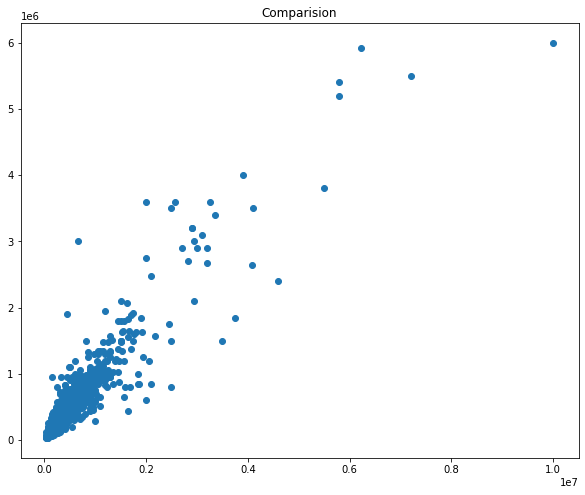

In [43]:
plt.figure(figsize=[10,8])
plt.scatter(y_test,y_predict)
plt.title('Comparision')
plt.savefig('scatter.png')

# Part-3 evaluating model using different metrics

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [45]:
mean_absolute_error(y_test,y_predict)

110162.00119402986

In [46]:
mean_squared_error(y_test,y_predict)

56437099802.91387

In [47]:
rmse=np.sqrt(mean_squared_error(y_test,y_predict))

In [48]:
rmse

237564.93807570566